<a href="https://colab.research.google.com/github/Prince11jain/Mobile_Price_Range_Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mobile Price Prediction**



## **Introduction**



Mobile phones come in 
all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.


In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

# **Data Description -**
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

# **Methodology**
We will proceed with reading the data, and then perform data analysis. The practice of examining data using analytical or statistical methods in order to identify meaningful information is known as data analysis. After data analysis, we will find out the data distribution and data types. We will train 4 classification algorithms to predict the output. We will also compare the outputs. Let us get started with the project implementation.

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#some more 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from scipy.interpolate import interp1d

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

##Import relevent data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# mounting our drive path so that access the data
file_path= "/content/drive/MyDrive/data_mobile_price_range.csv"
df= pd.read_csv(file_path)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


 the info function to see the type of data in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Here we seen that the data consist 21 column and 2000 rows.

Now, we remove the data points with missing data.

In [ ]:
data_f = df[df['sc_w'] != 0]

In [ ]:
data_f.shape

(1820, 21)

### Data Cleaning 

In [ ]:
new_df=data_f

In [ ]:
# Lets raname column names to familiar names
new_df.rename(columns={'battery_power':'battery_life', 'blue':'bluetooth','fc':'front_camera' ,'four_g': '4G_network','m_dep':'thickness','n_cores':'numbers_of_cores','pc': 'rear_camera','three_g':'3G_network'},inplace=True)


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_life      1820 non-null   int64  
 1   bluetooth         1820 non-null   int64  
 2   clock_speed       1820 non-null   float64
 3   dual_sim          1820 non-null   int64  
 4   front_camera      1820 non-null   int64  
 5   4G_network        1820 non-null   int64  
 6   int_memory        1820 non-null   int64  
 7   thickness         1820 non-null   float64
 8   mobile_wt         1820 non-null   int64  
 9   numbers_of_cores  1820 non-null   int64  
 10  rear_camera       1820 non-null   int64  
 11  px_height         1820 non-null   int64  
 12  px_width          1820 non-null   int64  
 13  ram               1820 non-null   int64  
 14  sc_h              1820 non-null   int64  
 15  sc_w              1820 non-null   int64  
 16  talk_time         1820 non-null   int64  


# **EDA Starts:**

##Let us visualize the number of elements in each class of mobile phones.

## **Price Sagments**

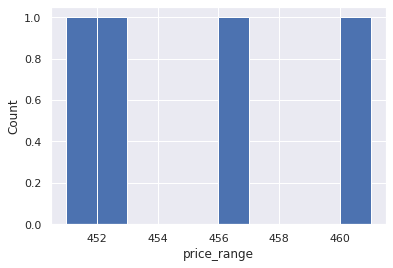

In [ ]:
#classes
sns.set()
price_plot=data_f['price_range'].value_counts().plot(kind = 'hist')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

## **RAM**

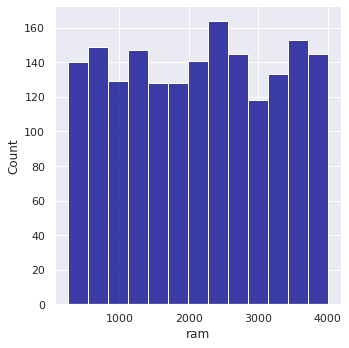

In [ ]:
# Lets plots the bar chart for variation in the ram.
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_f["ram"],color='darkblue')
plt.show()

Ram are varies from 256 MB to 4Gb. which is clearly shown in above chart.

###Random Access Memory in Mega Bytes

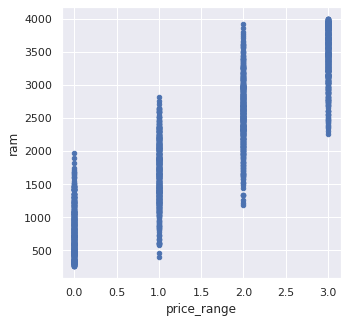

In [ ]:
# chart for price vs ram
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

In this scatter chart we seen that their are four type of price segments and as ram is increases the price of mobile phone also increases.

## **Screen types**

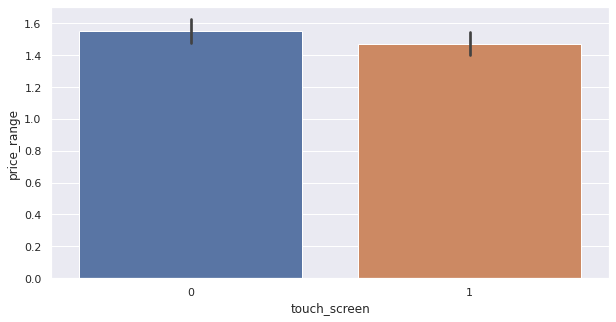

In [ ]:
# lets divide the data according to the touch screen features
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=data_f,x='touch_screen',y='price_range',ax=ax)

Here, we see that half of mobile phones have touch sceen feature and other half does not support touch feature.

### **Dimensions**

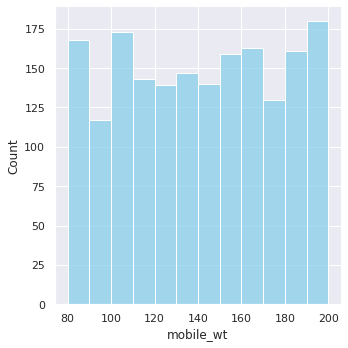

In [ ]:
# Lets discuss about the weight parameter 
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_f["mobile_wt"], color='skyblue')
plt.show()

Here, we found that the mobile weight are more then 80 grams and maximum wt. is under 200 grams.

### **Talktime**

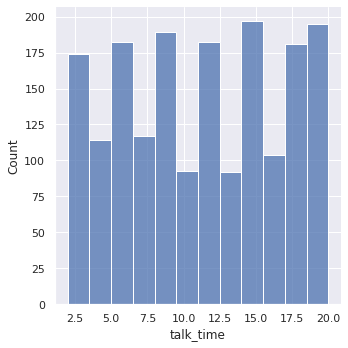

In [ ]:
#lets see the talk time parameter, how long mobile stand in talk time hours.
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_f["talk_time"])
plt.show()

This bar chart shown that the lowest talk time is 2.5 hour and longest talk time is 20 hour.

##Data Distribution
Let us analyse some data features and see their distribution.
###First, we see how the battery mAh is spread.

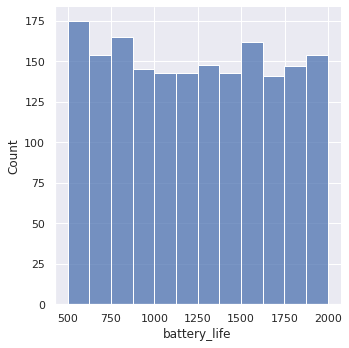

In [ ]:
# test for the battery life 
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_f["battery_life"])
plt.show()

Battery life starts from 500 MAH and goes to the 2000 MAH.And the the moblie having 500MAH battery are maximum in count.

## **Bluetooth**

**Now, we see the count of how many devices have Bluetooth and how many don’t.**

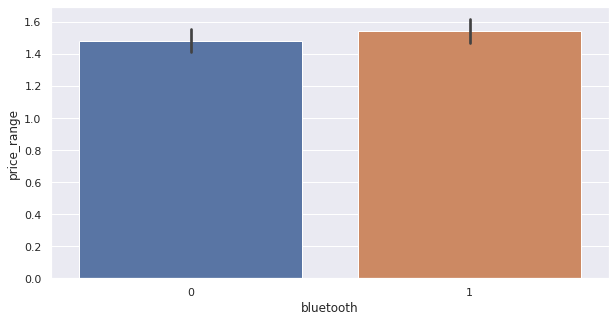

In [ ]:
# check for the availability for bluetooth.
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=data_f,x='bluetooth',y='price_range',ax=ax)

So, we can see that half the devices have Bluetooth, and half don’t.

### **Thickness(in cm).**

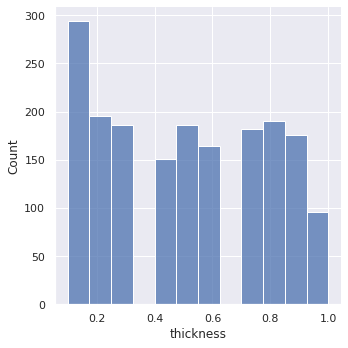

In [ ]:
# lets check the thickness of the mobile phone.
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_f["thickness"])
plt.show()

A few mobiles are very thin and a few ones are almost a cm thick.

## **Camera in mega pixels**

### **PC (Primary camera Megapixels)**

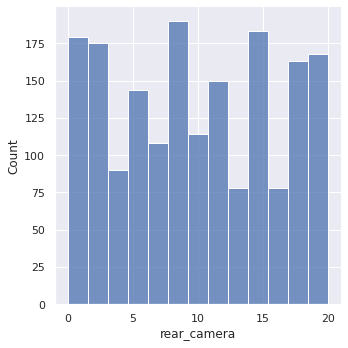

In [ ]:
# rear camera check
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_f["rear_camera"])
plt.show()

In this bar chart we found that some mobile does not contain camera and shows zero and also seen that the maximum moblie having 8mp camara and after it is followed by 13mp.


## **Front camera**

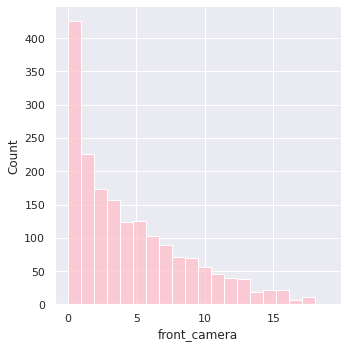

In [ ]:
# check for the front camera
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_f["front_camera"],color='pink')
plt.show()

Most of  phones Front Camera are  not available, and maximum phones contain 2mp front camera.  


# **Lets discuss various parameter vs price.**

In a similar way, the data distribution can be analysed for all the data features. Implementing that will be very simple.

### **Numbers of core vs price**

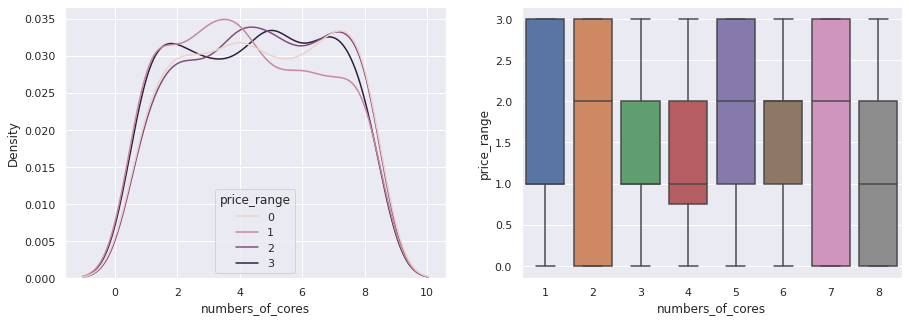

In [ ]:
# lets plots the box plot of number of and variation of price.
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data_f,x='numbers_of_cores',hue='price_range', ax=axs[0])
sns.boxplot(data=data_f,x='numbers_of_cores', y='price_range', ax=axs[1])
plt.show()

### **Weight vs price**

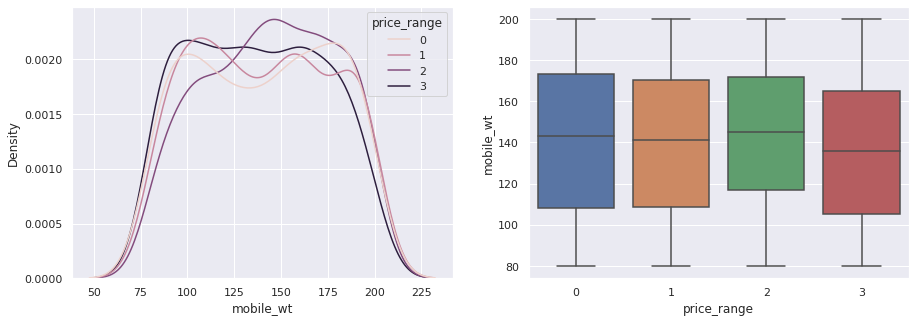

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data_f, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=data_f, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

It is seen that the lighter the phone higher the price of that phone.

## **Pixel Resolution Width**

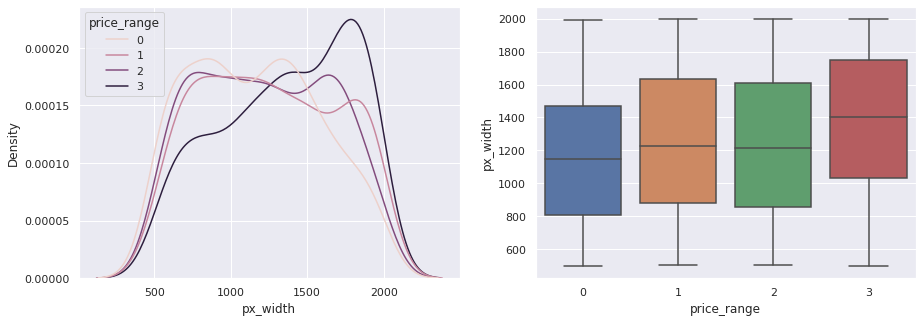

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data_f, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=data_f, x='price_range', y='px_width', ax=axs[1])
plt.show()

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

## **Pixel Resolution hight**

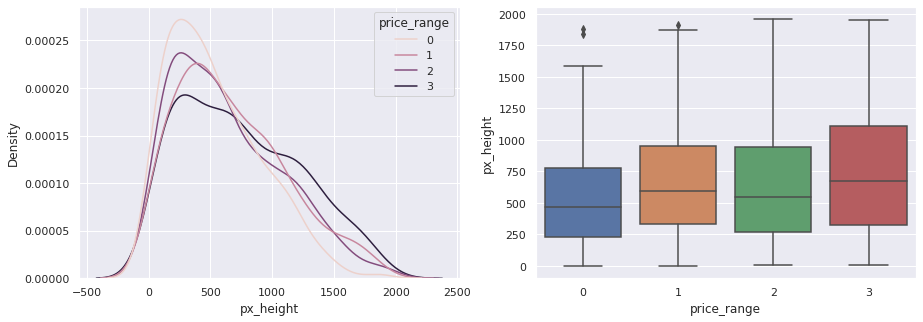

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data_f, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=data_f, x='price_range', y='px_height', ax=axs[1])
plt.show()

As the pixals are increases the price is also increaces shows the directly proportional relations.


## **Thickness vs price**

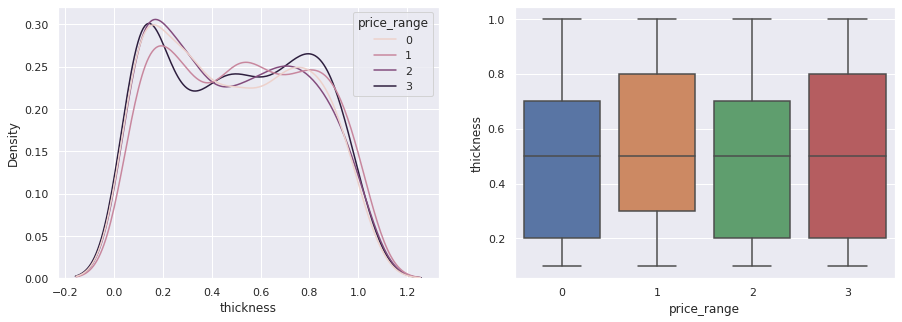

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data_f, x='thickness', hue='price_range', ax=axs[0])
sns.boxplot(data=data_f, x='price_range', y='thickness', ax=axs[1])
plt.show()

## **Ram vs price**

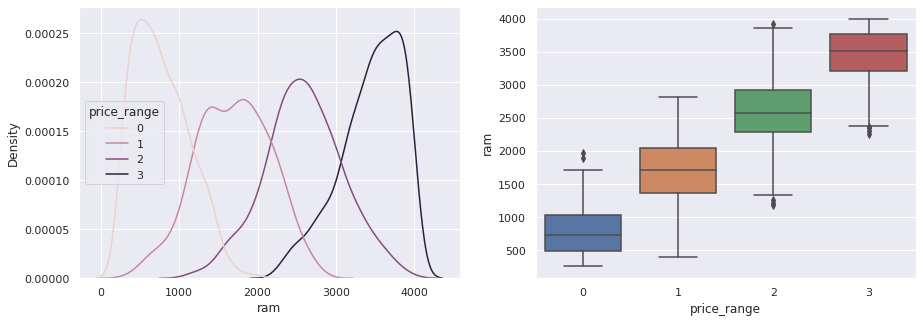

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=data_f, x='ram', hue='price_range', ax=axs[0])
sns.boxplot(data=data_f, x='price_range', y='ram', ax=axs[1])
plt.show()

clearly seen as ram increases the price is also increases. 

# **Connectivity**

In [ ]:
connectivity = ['3G_network','4G_network','bluetooth']

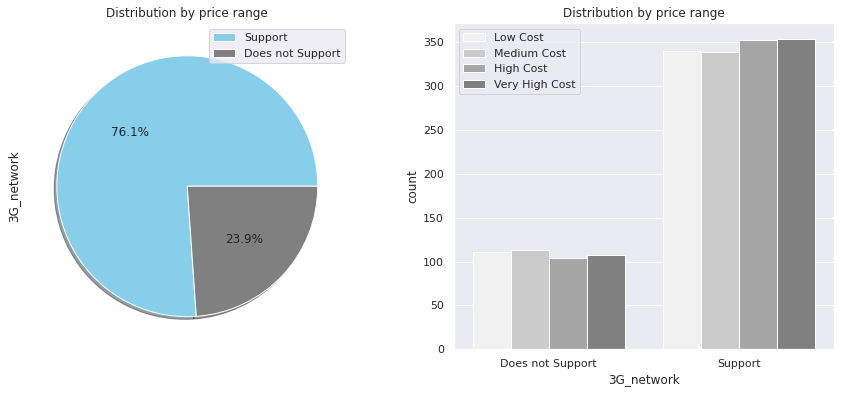

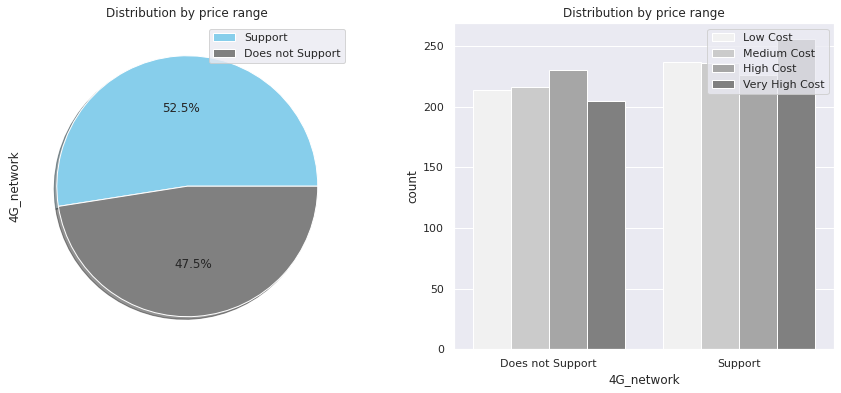

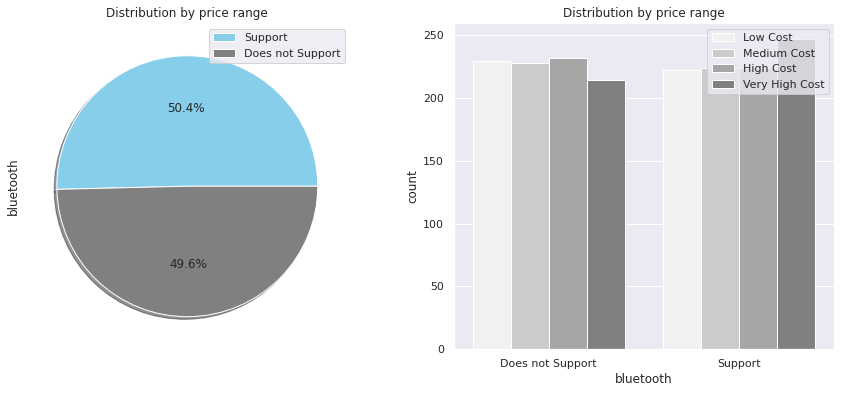

In [ ]:
# lets take a look about connectivity in mobile phone
for col in connectivity :
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  data_f[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None,colors = ['skyblue','gray'])
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = data_f, ax = ax2, color = 'gray')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])





*  Their are 76.1% mobile phone having 3G connectivity and 23.9 % does 
not support 3G.
*   Their are 52.5% mobile phone having 4G connectivity and 43.5 % does not support 4G.

*   Their are 50.4 % mobile phone having bluetooth connectivity and 49.6% does not bluetooth
*   Phone having all these connectivity are very expensive.







## **Camera**

In [ ]:
camera = ['front_camera','rear_camera']

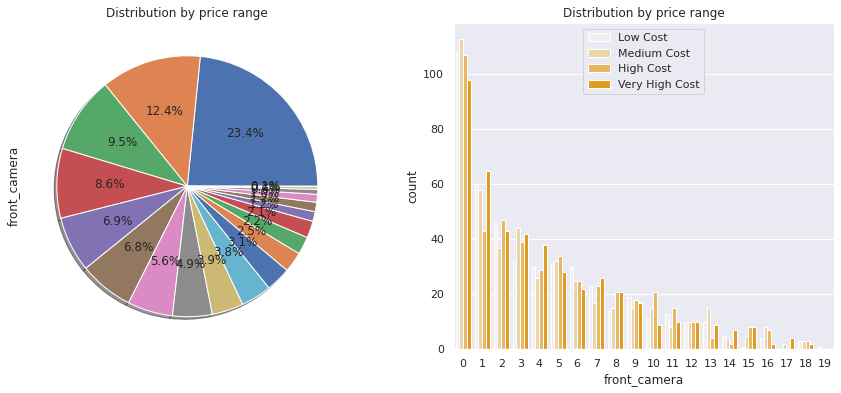

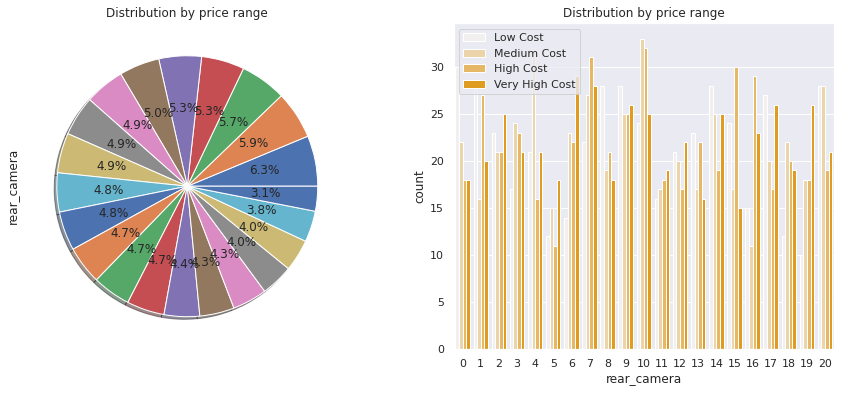

In [ ]:

for col in camera:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  data_f[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')

  sns.countplot(x = col, hue = 'price_range', data = data_f, ax = ax2, color = 'orange')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
 

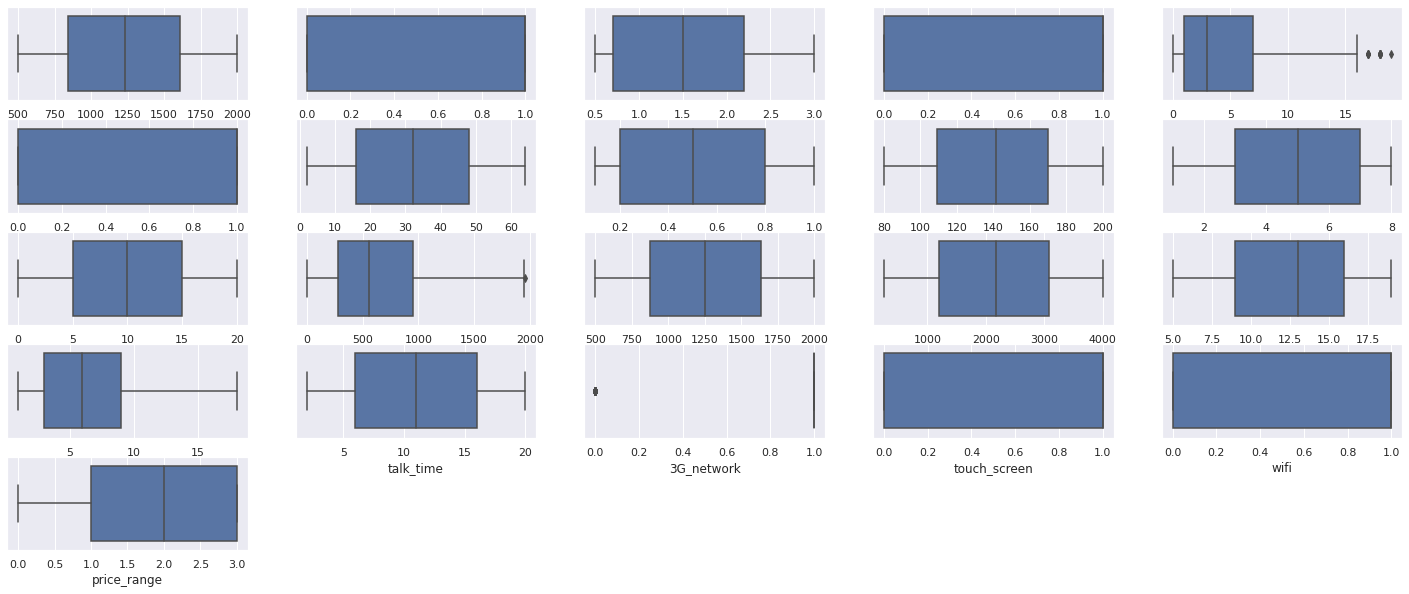

In [ ]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in data_f.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(data_f[item])
print("\n")

###Let us see if there are any missing values or missing data.



In [ ]:
X=data_f.drop(['price_range'], axis=1)
y=data_f['price_range']
#missing values
X.isna().any()

battery_life        False
bluetooth           False
clock_speed         False
dual_sim            False
front_camera        False
4G_network          False
int_memory          False
thickness           False
mobile_wt           False
numbers_of_cores    False
rear_camera         False
px_height           False
px_width            False
ram                 False
sc_h                False
sc_w                False
talk_time           False
3G_network          False
touch_screen        False
wifi                False
dtype: bool

Let us split the data.

In [ ]:
#test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

Now, definong  a function for creating a confusion matrix.

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Now, as the function is defined, we can proceed with implementing the classification algorithms.

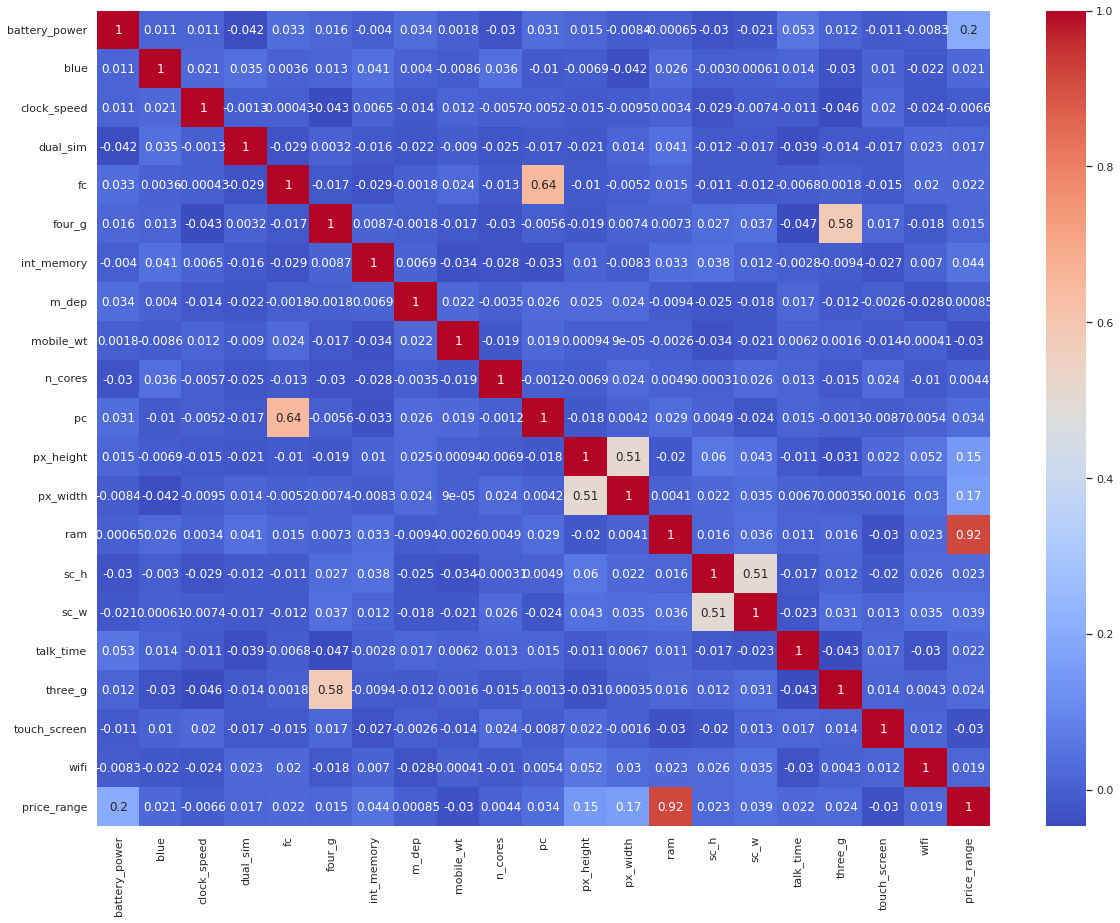

In [ ]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

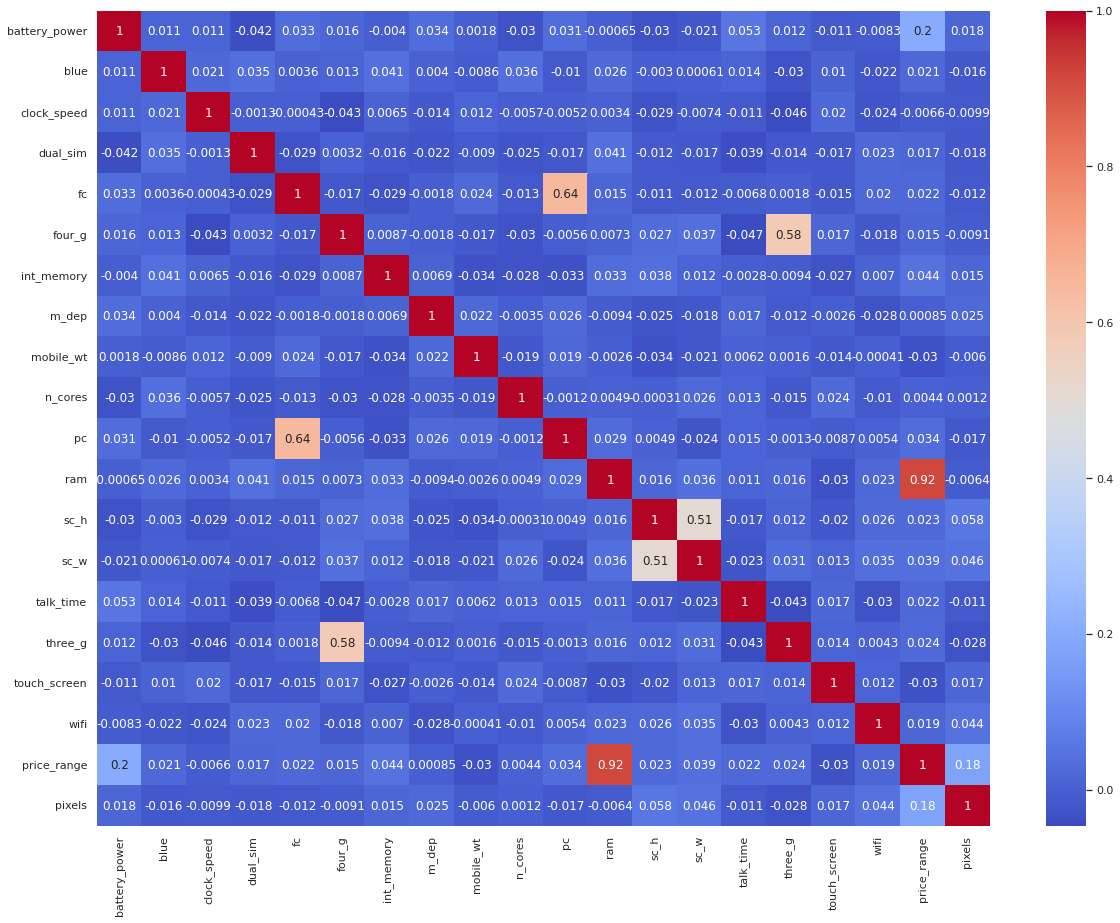

In [ ]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)



##Random Forest Classifier

A random forest system is built on a variety of decision trees. Every decision tree is made up of nodes that represent decisions, leaf nodes, and a root node. The leaf node of each tree represents the decision tree’s final result. The final product is chosen using a majority-voting procedure. In this situation, the output picked by the majority of the decision trees becomes the random forest system’s ultimate output. Let us now implement the random forest algorithm.

First, we build the model.

In [ ]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

Now, we do the training and prediction

In [ ]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

Let us apply the function for the accuracy metrics.

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



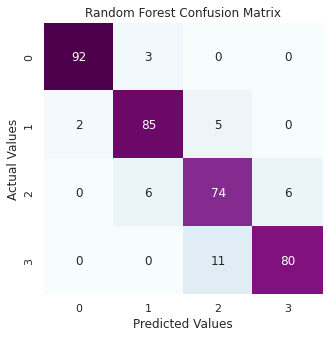

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

that the random forest algorithm has good accuracy in prediction.

##Naive Bayes

Naive Bayes is a Naive Bayes variation that allows continuous data and follows the Gaussian normal distribution. The Bayes theorem is the foundation of a family of supervised machine learning classification algorithms known as naive Bayes. It is a basic categorization approach with a lot of power. When the dimensionality of the inputs is high, they are useful. The Naive Bayes Classifier may also be used to solve complex classification issues.

Let us implement the Gaussian NB classifier.

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



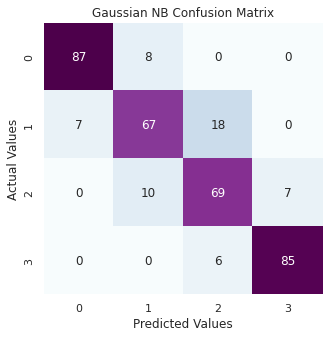

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)


print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

that the model is performing well.

##KNN Classifier

he K-NN method saves all available data and classifies a new data point based on its similarity to the existing data. This implies that fresh data may be quickly sorted into a well-defined category using the K-NN method. The K-NN algorithm is a non-parametric algorithm, which means it makes no assumptions about the underlying data. It’s also known as a lazy learner algorithm since it doesn’t learn from the training set right away; instead, it saves the dataset and performs an action on it when it comes time to classify it.

Let us perform the implementation of the classifier.

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



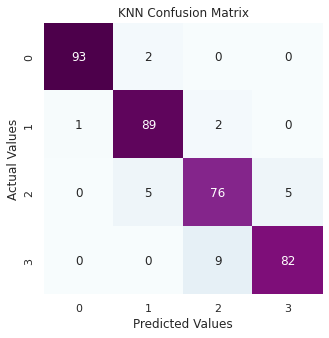

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)


knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)


print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

The KNN classifier is quite adept at its task.

##SVM Classifier

The SVM algorithm’s purpose is to find the optimum line or decision boundary for categorising n-dimensional space so that we may simply place fresh data points in the proper category in the future. A hyperplane is the optimal choice boundary.


Let us do the implementation of SVM.

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



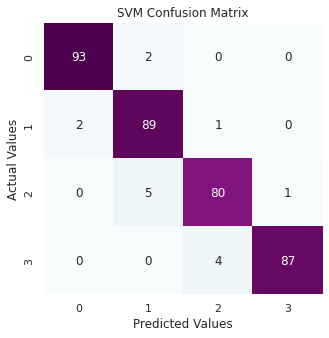

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

We can see that the SVM classifier is giving the best accuracy

##Conclusion
In this article, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.

see that here are mobile phones in 4 price ranges. The number of elements is
almost similar.

half the devices have Bluetooth, and half don’t

there is a gradual increase in battery as the price range increases

Ram has continuous increase with price range while moving from Low cost to Very high cost

costly phones are lighter

RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

form all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results